In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="1mo")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-03-25 00:00:00-04:00,283.600006,288.200012,271.279999,288.140015,150361500,0.0,0.0
1,2025-03-26 00:00:00-04:00,282.660004,284.899994,266.510010,272.059998,153629800,0.0,0.0
2,2025-03-27 00:00:00-04:00,272.480011,291.850006,271.820007,273.130005,162572100,0.0,0.0
3,2025-03-28 00:00:00-04:00,275.579987,276.100006,260.570007,263.549988,123809400,0.0,0.0
4,2025-03-31 00:00:00-04:00,249.309998,260.559998,243.360001,259.160004,134008900,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [23]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"}
response = requests.get(url, headers=headers)
tables = pd.read_html(response.text, match="Tesla Quarterly Revenue", flavor='bs4')
tesla_revenue = tables[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()


<ipython-input-23-952f0594763b>:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text, match="Tesla Quarterly Revenue", flavor='bs4')


,Date,Revenue
0,2025-03-31,19335
1,2024-12-31,25707
2,2024-09-30,25182
3,2024-06-30,25500
4,2024-03-31,21301


Question 3 - Extracting GameStop Stock Data Using yfinance

In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting Gamestop Revenue Data Using Webscraping

In [15]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"}
response = requests.get(url, headers=headers)
html_data = response.text
soup = BeautifulSoup(html_data, "html5lib")
tables = pd.read_html(response.text, match="GameStop Quarterly Revenue", flavor='bs4')
gme_revenue = tables[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

<ipython-input-15-7103cb768fd5>:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text, match="GameStop Quarterly Revenue", flavor='bs4')


,Date,Revenue
0,2025-01-31,1283
1,2024-10-31,860
2,2024-07-31,798
3,2024-04-30,882
4,2024-01-31,1794


Question 5 - Tesla Stock and Revenue Dashboard

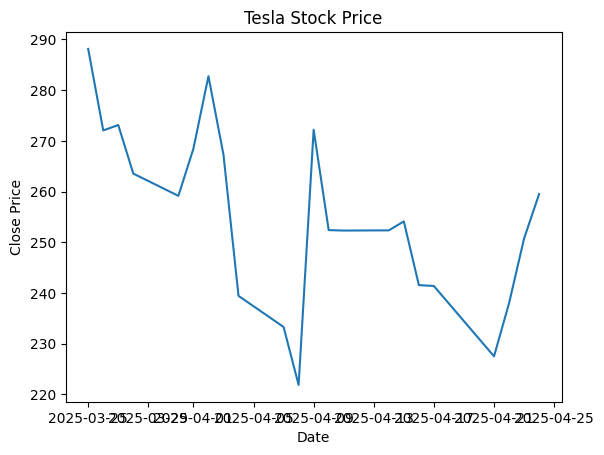

In [26]:
plt.plot(tesla_data['Date'], tesla_data['Close'])
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

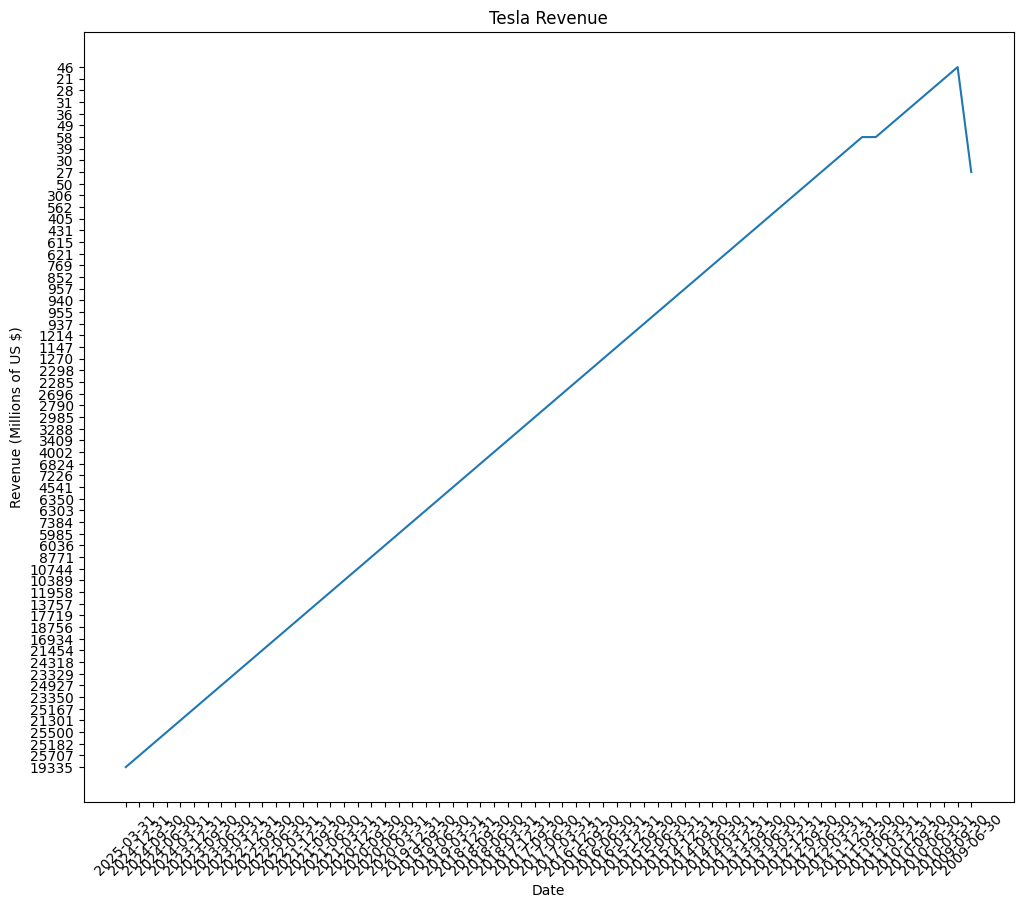

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'])
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (Millions of US $)")
plt.xticks(rotation=45)
plt.show()

Question 6 - GameStop Stock and Revenue Dashboard

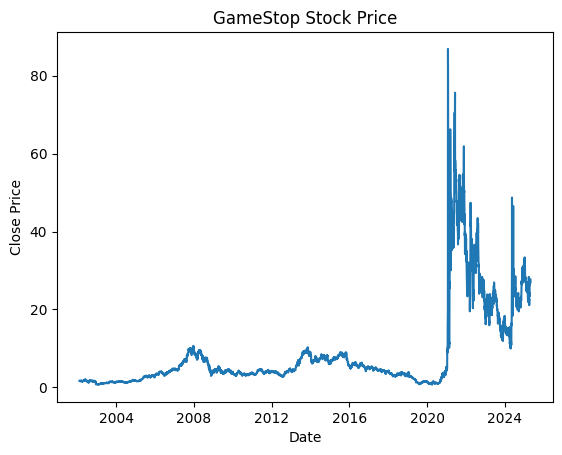

In [28]:
plt.plot(gme_data['Date'], gme_data['Close'])
plt.title("GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

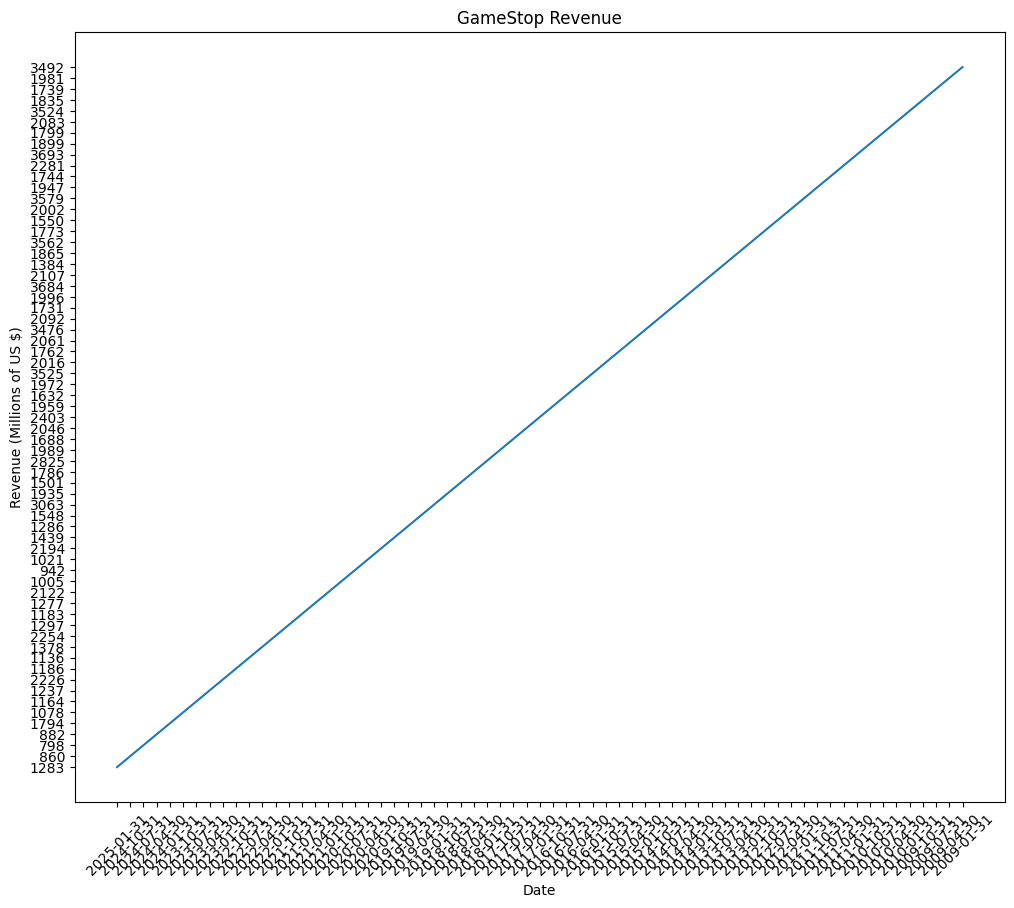

In [34]:
plt.figure(figsize=(12, 10))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'])
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (Millions of US $)")
plt.xticks(rotation=45)
plt.show()